In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dates = pd.date_range(start='2023-01-01', periods=252, freq='B')  # 252 días hábiles en un año
np.random.seed(42)
prices = np.random.lognormal(mean=0.0005, sigma=0.01, size=len(dates)) * 100
df = pd.DataFrame({'Fecha': dates, 'Precio_Cierre': prices})
df.set_index('Fecha', inplace=True)
df.head()

,Precio_Cierre
Fecha,
2023-01-02,100.548211
2023-01-03,99.911775
2023-01-04,100.700128
2023-01-05,101.585467
2023-01-06,99.816016


In [3]:
df['Retorno_Diario'] = df['Precio_Cierre'].pct_change()
df.head()

,Precio_Cierre,Retorno_Diario
Fecha,,
2023-01-02,100.548211,NaN
2023-01-03,99.911775,-0.006330
2023-01-04,100.700128,0.007890
2023-01-05,101.585467,0.008792
2023-01-06,99.816016,-0.017418


In [4]:
df['Media_Movil_20'] = df['Precio_Cierre'].rolling(window=20).mean()
df['Media_Movil_50'] = df['Precio_Cierre'].rolling(window=50).mean()
df.head()

,Precio_Cierre,Retorno_Diario,Media_Movil_20,Media_Movil_50
Fecha,,,,
2023-01-02,100.548211,NaN,NaN,NaN
2023-01-03,99.911775,-0.006330,NaN,NaN
2023-01-04,100.700128,0.007890,NaN,NaN
2023-01-05,101.585467,0.008792,NaN,NaN
2023-01-06,99.816016,-0.017418,NaN,NaN


In [5]:
df['Rendimiento_Acumulado'] = (1 + df['Retorno_Diario']).cumprod()
df.head()

,Precio_Cierre,Retorno_Diario,Media_Movil_20,Media_Movil_50,Rendimiento_Acumulado
Fecha,,,,,
2023-01-02,100.548211,NaN,NaN,NaN,NaN
2023-01-03,99.911775,-0.006330,NaN,NaN,0.993670
2023-01-04,100.700128,0.007890,NaN,NaN,1.001511
2023-01-05,101.585467,0.008792,NaN,NaN,1.010316
2023-01-06,99.816016,-0.017418,NaN,NaN,0.992718


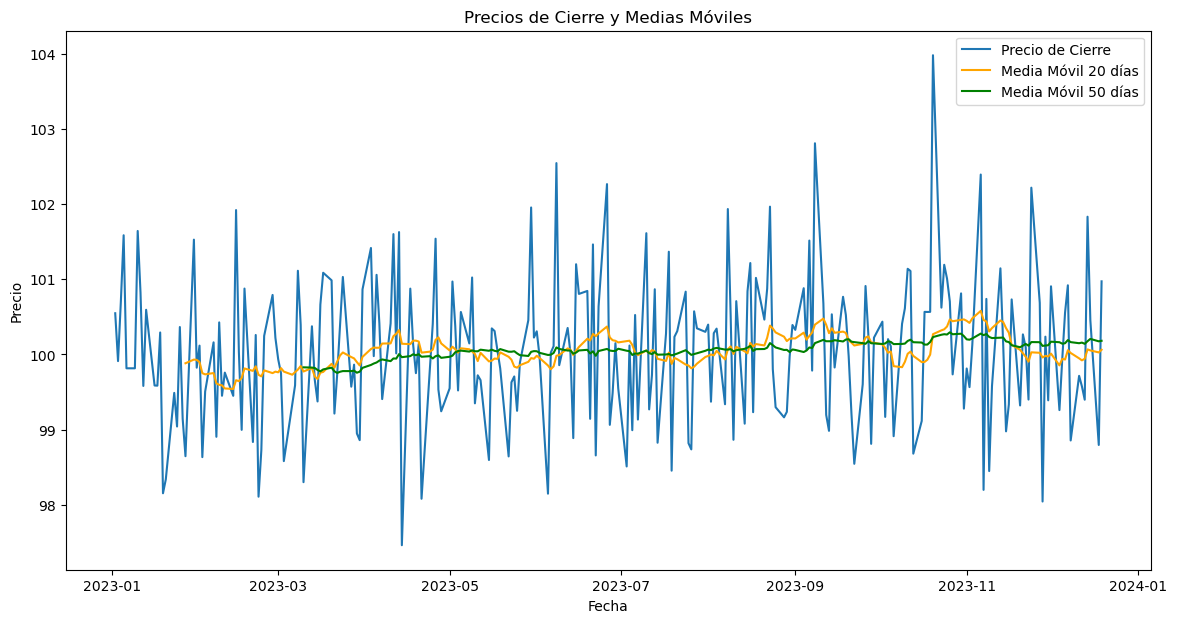

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Precio_Cierre'], label='Precio de Cierre')
plt.plot(df.index, df['Media_Movil_20'], label='Media Móvil 20 días', color='orange')
plt.plot(df.index, df['Media_Movil_50'], label='Media Móvil 50 días', color='green')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precios de Cierre y Medias Móviles')
plt.legend()
plt.show()

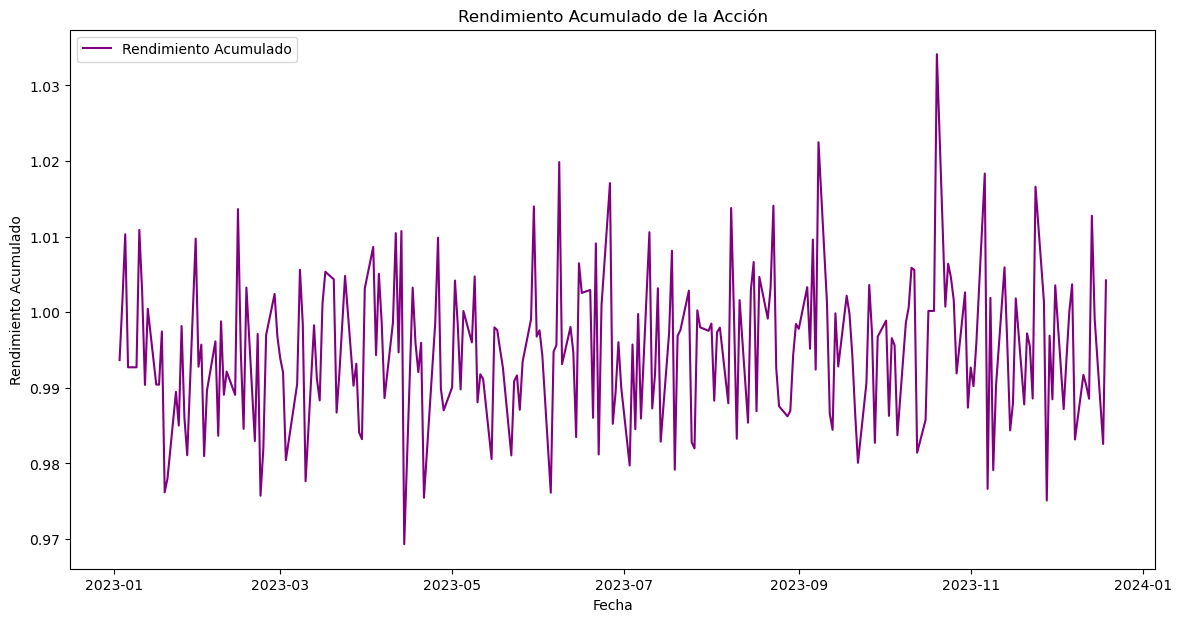

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Rendimiento_Acumulado'], label='Rendimiento Acumulado', color='purple')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento Acumulado')
plt.title('Rendimiento Acumulado de la Acción')
plt.legend()
plt.show()